---
layout: default
title: "Neural Networks - Backpropagation"
categories: neuralNetwork
permalink: /ML13/
order: 13
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann
from graphviz import Digraph
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


# Gradien Descent
The aim of a neural network is, to minimize the cost function calculated on its parameters, which, if using the same network as in 
<a href="ML10#simpleann">ML-10</a>, are: 

$$
\begin{align}
& W^{[1]} \in \mathbb{R}^{(n^{[1]}, n^{[0]})} \\
& b^{[1]} \in \mathbb{R}^{(n^{[1]}, 1)} \\
& W^{[2]} \in \mathbb{R}^{(n^{[2]}, n^{[1]})} \\
& b^{[2]} \in \mathbb{R}^{(n^{[2]}, 1)}
\end{align}
$$

The cost function ($J$) is defined as the average over the training examples of the loss function ($\mathcal{L}$) for a single example:

$$
J(W^{[1]},b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}\left(\hat{y}, y \right)
$$

where, if the network is used for binary classification, $\mathcal{L}$ can be exactly the same as in logistic regression.

In order to train the network, we will need to perform gradient descent, so:

* For each iteration until convergence:

    1. compute the prediciton $\hat{y}$
    2. compute the derivatives $\frac{\partial J}{\partial W^{[1]}}, \frac{\partial J}{\partial b^{[1]}},\frac{\partial J}{\partial W^{[2]}}, \frac{\partial J}{\partial b^{[2]}}$
    3. update the parameters $W^{[1]}=W^{[1]}-\alpha \frac{\partial J}{\partial W^{[1]}},\cdots$


# Backpropagation
In order to compute the derivatives in a neural network, we use a technique called **backpropagation**, where we proceed step by step backwards in the computation of the contribution to $J$ from weights of the different layers from the rightmost to the leftmost taking advantage of the [chain rule](https://en.wikipedia.org/wiki/Chain_rule).

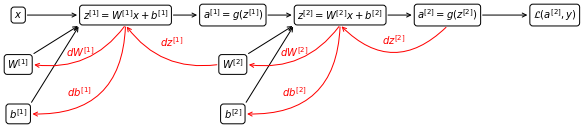

In [22]:
fig, ax = plt.subplots(figsize=(10, 2))
f = Flow(ax=ax)
f.node('x', label='$x$')
f.node('W1', label='$W^{[1]}$', travel='s', connect=False)
f.node('b1', label='$b^{[1]}$', travel='s', connect=False)
f.node('z1', label='$z^{[1]}=W^{[1]}x+b^{[1]}$', startpoint='x')
f.edge('W1', 'z1')
f.edge('b1', 'z1')
f.node('a1', label='$a^{[1]}=g(z^{[1]})$')
f.node('W2', label='$W^{[2]}$', travel='s', connect=False)
f.node('b2', label='$b^{[2]}$', travel='s', connect=False)
f.node('z2', label='$z^{[2]}=W^{[2]}x+b^{[2]}$', startpoint='a1')
f.edge('W2', 'z2')
f.edge('b2', 'z2')
f.node('a2', label='$a^{[2]}=g(z^{[2]})$', startpoint='z2')
f.node('L', label='$\\mathcal{L}(a^{[2]}, y)$')
# f.edge('L', 'a2', tailport='s', headport='s', arrowprops=dict(connectionstyle='arc3,rad=0.5', color='r'), c='r', label='$da^{[2]}$')
f.edge('a2', 'z2', tailport='s', headport='s', arrowprops=dict(connectionstyle='arc3,rad=0.5', color='r'), c='r', label='$dz^{[2]}$')
f.edge('z2', 'W2', tailport='s', headport='e', arrowprops=dict(connectionstyle='arc3,rad=0.3', color='r'), c='r', label='$dW^{[2]}$')
f.edge('z2', 'b2', tailport='s', headport='e', arrowprops=dict(connectionstyle='arc3,rad=0.5', color='r'), c='r', label='$db^{[2]}$')
f.edge('W2', 'z1', tailport='w', headport='s', arrowprops=dict(connectionstyle='arc3,rad=0.3', color='r'), c='r', label='$dz^{[1]}$')
f.edge('z1', 'W1', tailport='s', headport='e', arrowprops=dict(connectionstyle='arc3,rad=0.3', color='r'), c='r', label='$dW^{[1]}$')
f.edge('z1', 'b1', tailport='s', headport='e', arrowprops=dict(connectionstyle='arc3,rad=0.5', color='r'), c='r', label='$db^{[1]}$')

The derivative $dW^{[2]}= \frac{\partial J}{\partial W^{[2]}}$ and $db^{[2]}= \frac{\partial J}{\partial b^{[2]}}$ are esaily calculated in two steps:

$$
\begin{aligned}
&dZ^{[2]}=A^{[2]} - Y\\
&dW^{[2]}= \frac{1}{m}dZ^{[2]}A^{[1]T}\\
&db^{[2]}= \frac{1}{m}\sum dZ^{[2]}
\end{aligned}
$$

We can see that in order to calculate $dW^{[2]}$ and $db^{[2]}$, we need to calculate the term $dZ^{[2]}$, that represents the error a layer.

To calculate $dW^{[1]}$ and $db^{[1]}$, we need $dZ^{[2]}$, which is calculated building on the the calculation in the previous layer

$$
\begin{aligned}
&dZ^{[1]}= W^{[2]T} dZ^{[2]} \odot g' (Z^{[1]})\\
&dW^{[1]}= \frac{1}{m}dZ^{[2]}\\
&db^{[1]}= \frac{1}{m}\sum dZ^{[1]}
\end{aligned}
$$